# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Esercizi di laboratorio N.1


### Esercizio 01_1


E' possibile cambiare i parametri in ingresso modificando il file "Parameters.dat" (vedi "Guida.txt").
Questo jupyter elabora i risultati presenti nella cartella "RisultatiNotebook". Se si cambiano i parametri di esecuzione è necessario copiare i nuovi risultati in questa cartella.

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. 
Di seguito il grafico della stima  di $\langle r \rangle $ con la sua incertezza. Viene usato il metodo della divisione in blocchi. Quella rappresentata è la distanza della stima del valor medio della distribuzione uniforme dal valore vero di $\frac{1}{2}$ come media sui blocchi al variare del numero di blocchi considerati.

Numero di lanci totali = 100000.0
Numero di blocchi = 100.0
Lunghezza del blocco =  1000


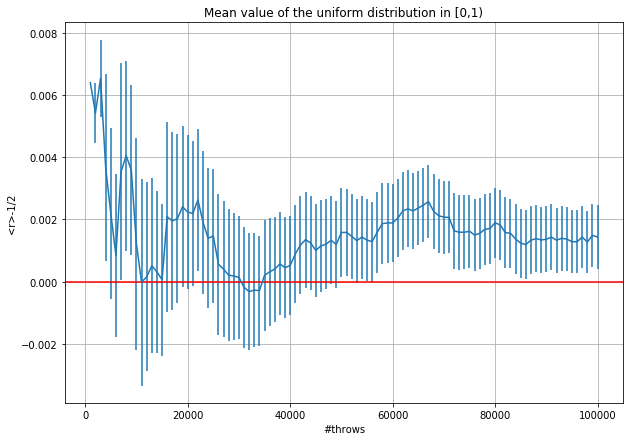

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

read=open("RisultatiNotebook/es01_1/Parameters.dat")
M=read.readline()
M=float(M)
N=read.readline()
N=float(N)
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x, f , error=  np.loadtxt("RisultatiNotebook/es01_1/Risultati/RandomData.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
print('Numero di lanci totali =', M)
print('Numero di blocchi =', N)
print("Lunghezza del blocco = ", L)

fig=plt.figure(figsize=(10,7))
plt.errorbar(x,f-0.5, yerr=error)
plt.title("Mean value of the uniform distribution in [0,1)")
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.axhline(y=0, color='r')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.
L'implementazione è identica a quella dell'esercizio precedente.

Numero di lanci totali = 100000.0
Numero di blocchi = 100.0
Lunghezza del blocco =  1000


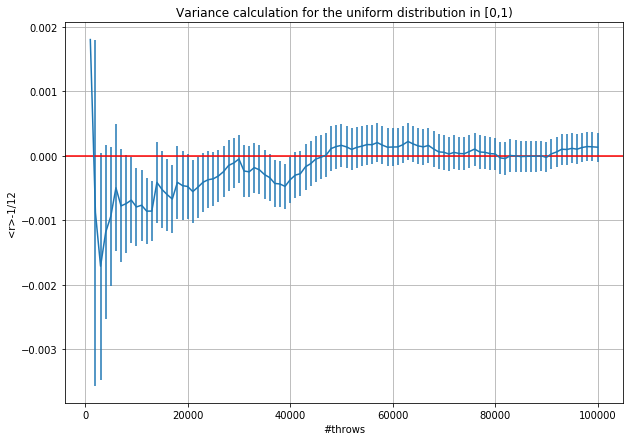

In [2]:
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x, f , error=  np.loadtxt("RisultatiNotebook/es01_1/Risultati/SigmaData.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
print('Numero di lanci totali =', M)
print('Numero di blocchi =', N)
print("Lunghezza del blocco = ", L)

fig=plt.figure(figsize=(10,7))
plt.errorbar(x,f-1/12, yerr=error)
plt.title("Variance calculation for the uniform distribution in [0,1)")
plt.xlabel('#throws')
plt.ylabel('<r>-1/12')
plt.axhline(y=0., color='r')
plt.grid(True)

plt.show()

### Chi Test
Eseguiamo uno studio della qualità del nostro generatore di numeri pseudo casuali. 
Utilizziamo il test cumulativo di Pearson $\chi^2$. 
Indichiamo i valori osservati con $O_i$ e il valore atteso con $E_i$. Calcoliamo il rapporto tra lo scarto quadratico e la varianza della distribuzione. Come varianza usiamo proprio $E_i$ (approssimazione della varianza dellabinomiale per piccole probabilità di un successo).

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

Come richiesto dall'esercizio ho diviso l'intervallo $[0,1]$ in $M$ sottointervalli di uguale lunghezza. Fissato l'intervallo, l'evento $successo$ è rappresentato dall'estrarre un numero nell'intervallo. 
Indicando con $p$ la probabilità del successo e ricordando che il valore medio della binomiale è dato da $E_i=np$, dopo $n$ lanci, il valore atteso $E_I$ dovrebbe essere
$$np=\frac{n}{M}$$

da cui è evidente che più $M$ è grande migliore è la nostra approssimazione di "piccola probabilità di successo", prestando attenzione a non dover aumentare eccessivamente il numero di lanci per avere sufficienti dati per fare statistica.

Nel nostro caso, se $n_i$ sono i successi per ogni intervallo:

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

Il test è stato eseguito con $M=10^2$ sottointervalli, $n=10^4$ estrazioni e ripetuto $100$ volte. Grafico ogni stima di $\chi^2$.


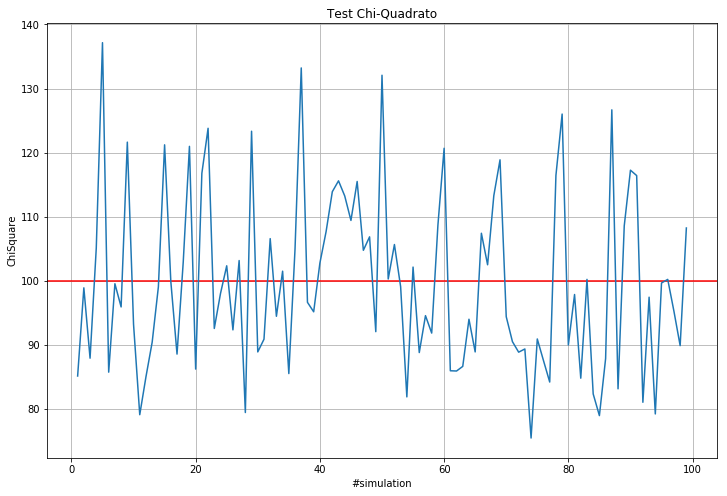

In [3]:
n=10000               # Total number of throws
N=100                 # Number of sub-intervals
np.random.seed(0)     # Fixing random seed for reproducibility
x = np.arange(N)      # [0,1,2,...,N-1]

chi_square = np.zeros(N)
file = open("RisultatiNotebook/es01_1/Risultati/ChiData.dat")
raw = file.readlines()

for i in range(N):
    chi_square[i]=float(raw[i])

file.close()  

fig=plt.figure(figsize=(12,8))
plt.axhline(y=100,color ='r')
plt.plot(x, chi_square)
plt.xlabel('#simulation')
plt.ylabel('ChiSquare')
plt.title('Test Chi-Quadrato')
plt.grid(True)
plt.show()

### Esercio 01_2
- Verifichiamo il teorema del limite centrale con diverse distribuzioni

Ho aggiunto due metodi alla classe **Random** per generare numeri pseudo casuali che si distribuissero come un **esponenziale** e coma una distribuzione di **Cauchy-Lorentz**:

$$p(x)=\lambda\exp(-\lambda x), \; x\in [0;+\infty]$$

$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}, \; x \in \mathbb{R} $$

Parametri
$\lambda=1$, $\mu=0$ e $\Gamma=1$.

Per il teorema del limite centrale mi aspetto, all'aumentare di $N$, che le medie $S_N=\frac{1}{N}\sum_{i=1}^N x_i$ seguano una distribuzione sempre più simile a una precisa distribuzione limite.
Ho realizzato, per tre distribuzioni diverse (Uniforme, Esponenziale e Lorenziana), 4 grafici al variare di $N={1,2,10,100}$. La distribuzione delle prime due medie deve tendere a una **Gaussiana** mentre l'ultima dovrebbe rimanere **Lorenziana**.

Dai primi due grafici è anche graficamente evidente il diminuire della varianza all'aumentare di $N$.
I due fit sono significativi per quanto riguarda la varianza. Ho calcolato lo scarto relativo dal valore atteso.
(Non ho normalizzato le distribuzioni, dunque la normalizzazione del fit non è quella attesa dal teorema del limite centrale).

optimized parameters [A,mu,s] =
[8.77135068e+01 4.99448517e-01 8.03261601e-04]
parameters uncertainty =
[7.03872330e-01 2.62613657e-04 1.48873828e-05]


Il valore della varianza ottenuto dal fit si discosta da quello limite teorico del
3.6086079369696984 %


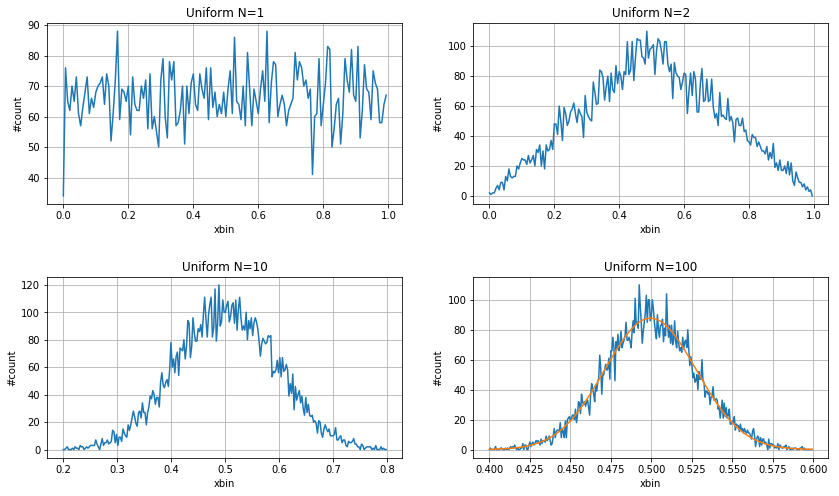

In [10]:
from scipy.optimize import curve_fit

def f(x,A,mu,s):  #funzione per il fit
    return A* np.exp(-(x-mu)**2/(2*s)) #gaussiana

bU1, U1 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/UniformData1.dat", usecols=(0,1), delimiter='   ', unpack='true')
bU2, U2 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/UniformData2.dat", usecols=(0,1), delimiter='   ', unpack='true')
bU10, U10 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/UniformData10.dat", usecols=(0,1), delimiter='   ', unpack='true')
bU100, U100 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/UniformData100.dat", usecols=(0,1), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
plt.plot(bU1,U1)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Uniform N=1')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(bU2,U2)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Uniform N=2')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(bU10,U10)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Uniform N=10')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(bU100,U100)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Uniform N=100')
plt.grid(True)

p_opt, p_cov = curve_fit(f, bU100, U100, bounds=([60,0.45,0],[100,0.55,0.005]))
y_fit = f(bU100,p_opt[0],p_opt[1],p_opt[2])
plt.plot(bU100,y_fit) # plotting fitted function

print("optimized parameters [A,mu,s] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))


SE=1/1200
print('\n')
print("Il valore della varianza ottenuto dal fit si discosta da quello limite teorico del")
print((SE-p_opt[2])*100/SE,"%")
plt.show()

optimized parameters [A,mu,s] =
[1.05000000e+02 9.94683921e-01 9.98378115e-03]
parameters uncertainty =
[8.00694048e-01 8.79819998e-04 1.75822019e-04]


Il valore della varianza ottenuto dal fit si discosta da quello limite teorico dello
0.1621885490272687 %


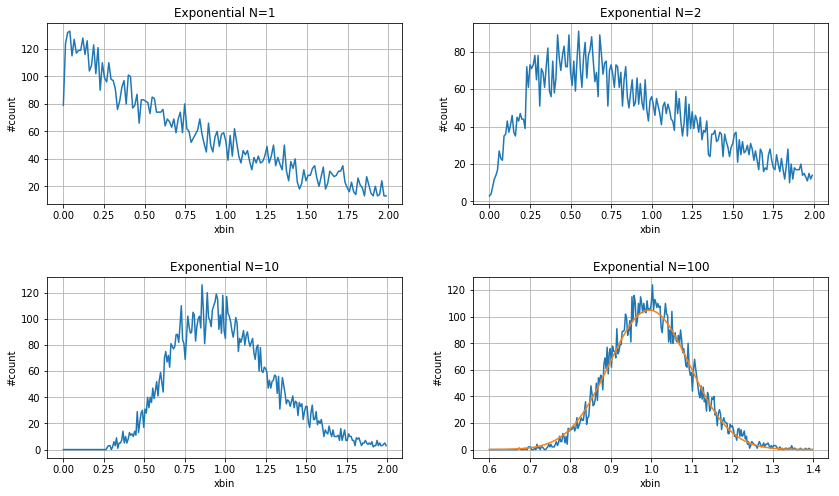

In [11]:
def f(x,A,mu,s):  #funzione per il fit
    return A* np.exp(-(x-mu)**2/(2*s)) #gaussiana

bE1, E1 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/ExponentialData1.dat", usecols=(0,1), delimiter='   ', unpack='true')
bE2, E2 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/ExponentialData2.dat", usecols=(0,1), delimiter='   ', unpack='true')
bE10, E10 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/ExponentialData10.dat", usecols=(0,1), delimiter='   ', unpack='true')
bE100, E100 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/ExponentialData100.dat", usecols=(0,1), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
plt.plot(bE1,E1)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Exponential N=1')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(bE2,E2)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Exponential N=2')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(bE10,E10)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Exponential N=10')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(bE100,E100)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Exponential N=100')
plt.grid(True)

p_opt, p_cov = curve_fit(f, bE100, E100, bounds=([100,0.8,0],[105,1.1,0.1]))
y_fit = f(bE100,p_opt[0],p_opt[1],p_opt[2])
plt.plot(bE100,y_fit) # plotting fitted function

print("optimized parameters [A,mu,s] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

SE=1/100
print('\n')
print("Il valore della varianza ottenuto dal fit si discosta da quello limite teorico dello")
print(((SE-p_opt[2])*100/SE),"%")
plt.show()

plt.show()

optimized parameters [A,gamma,mu] =
[ 1.05393812e+02  9.69710674e-01 -7.73071031e-03]
parameters uncertainty =
[1.09083626 0.01421143 0.00992403]


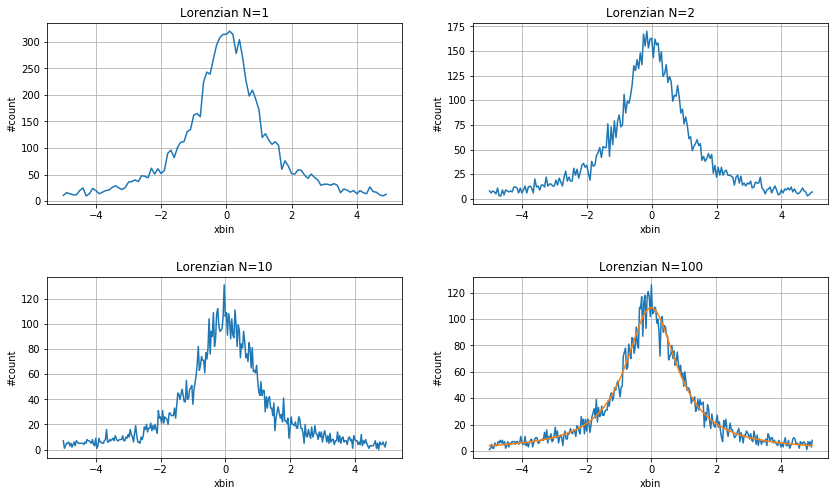

In [12]:
def f(x,A,gamma, mu):  #funzione per il fit
    return A*gamma/(gamma*gamma+(x-mu)*(x-mu))  #lorenziana

bL1, L1 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/LorenzianData1.dat", usecols=(0,1), delimiter='   ', unpack='true')
bL2, L2 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/LorenzianData2.dat", usecols=(0,1), delimiter='   ', unpack='true')
bL10, L10 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/LorenzianData10.dat", usecols=(0,1), delimiter='   ', unpack='true')
bL100, L100 = np.loadtxt("RisultatiNotebook/es01_2/Risultati/LorenzianData100.dat", usecols=(0,1), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
plt.plot(bL1,L1)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Lorenzian N=1')
plt.grid(True)

plt.subplot(2,2,2)

plt.plot(bL2,L2)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Lorenzian N=2')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(bL10,L10)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Lorenzian N=10')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(bL100,L100)
plt.xlabel('xbin')
plt.ylabel('#count')
plt.title('Lorenzian N=100')
plt.grid(True)


p_opt, p_cov = curve_fit(f, bL100, L100, bounds=([100,0,-1],[110,1,0.1]))
y_fit = f(bL100,p_opt[0],p_opt[1],p_opt[2])
plt.plot(bL100,y_fit) # plotting fitted function

print("optimized parameters [A,gamma,mu] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

### Esercizio 01_3
Simulazione dell'esperimento di Buffon.
Indico con $L$ la lunghezza dell'ago, $d$ la distanza tra le righe e con $P$ la probabilità che l'ago intercetti una riga. Poichè $P = 2L/\pi d$, è possibile eseguire una stima di $\pi$ trasformandola in una stima di $P$. Se l'ago viene lanciato $N_{thr}$ volte e interseca una riga $N_{hit}$ volte, allora la probabilità può essere stimata dal rapporto.
Nel limite in cui $N_{thr} \to\infty$ si ha

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Di nuovo, la simulazione è eseguita su $M$ passi MonteCarlo divisi in $N$ blocchi. Di seguito il grafico della simulazione in funzione del numero di blocchi considerati.

Il programma ha un tempo di esecuzione estremamente sensibile al valore dei parametri in ingresso. In particolare il numero di punti utilizzati per una singola stima di $\pi$, dal momento che ognuna di queste stime deve essere ripetuta un grande numero di volte ($>10^4$).

Il valore di $\pi$ dipende molto dai parametri di lunghezza ago e distanza tra le righe.

Lunghezza ago= 1.9
distanza righe= 2.0
Lunghezza piano= 4.0
Step totali MonteCarlo= 300000.0
Numero di blocchi= 100.0
Numero di punti usati per ogni stima di PiGreco= 1000.0


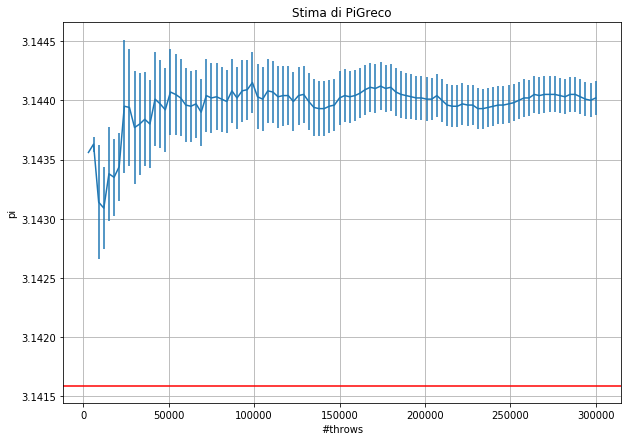

In [13]:
NeedleL, d, w, M, N, Npi = np.loadtxt("RisultatiNotebook/es01_3/Parameters.dat")
L=int(M/N)  # Number of throws in each block, please use for M a multiple of N
x, f , error=  np.loadtxt("RisultatiNotebook/es01_3/Risultati/PiData.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
fig=plt.figure(figsize=(10,7))
plt.errorbar(x,f, yerr=error)
plt.axhline(y=math.pi,color ='r')
plt.xlabel('#throws')
plt.ylabel('pi')
plt.title("Stima di PiGreco")
plt.grid(True)

print("Lunghezza ago=",NeedleL)
print("distanza righe=", d)
print("Lunghezza piano=",w)
print("Step totali MonteCarlo=",M)
print("Numero di blocchi=", N)
print("Numero di punti usati per ogni stima di PiGreco=",Npi)

plt.show()